In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [11]:
f_max = "max_state_50ms_single_core.npy"
f_min = "min_state_50ms_single_core.npy"
f_dist = "bucket_counts_50ms_single_core.npy"
val_labels = ["MBPKI", "IPC", "MPKI", "MDAPKI", "Celsius", "Watts", "KHz"]
maxs = np.load(f_max)
mins = np.load(f_min)
dist = np.load(f_dist)

In [16]:
print("\t\tmax\t\tmin")
for i in range(len(val_labels)):
    print("{}\t\t{:.2f}\t\t{}".format(val_labels[i], maxs[i], mins[i]))

		max		min
MBPKI		459.71		0.09150281305865614
IPC		11.56		0.00125051
MPKI		163.18		0.00883231790228972
MDAPKI		42522.13		24.890421633884333
Celsius		96.00		52.0
Watts		3.82		0.106704
KHz		2000000.00		200000.0


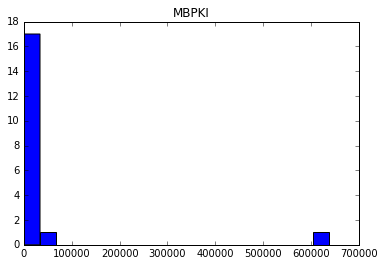

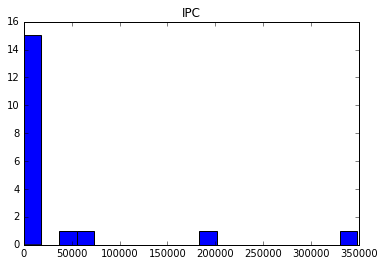

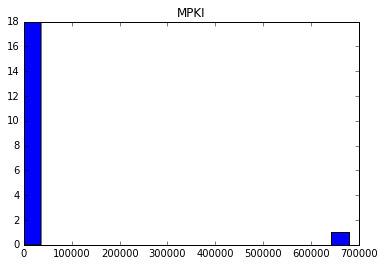

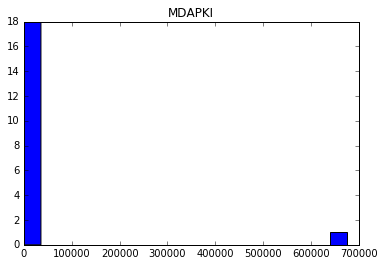

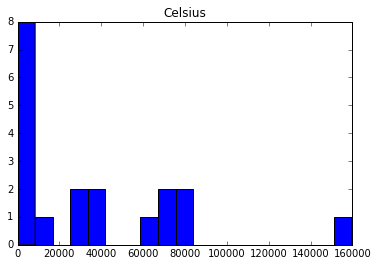

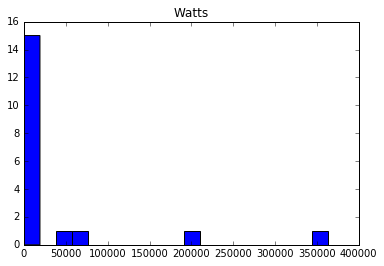

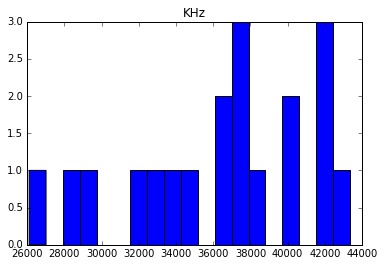

In [19]:
for i in range(len(dist)):
    plt.hist(dist[i], bins=len(dist[i]))
    plt.title(val_labels[i])
    plt.show()

In [22]:
raw_data = np.load("raw.npy")
raw_data

array([[  2.39969957e+01,   2.45800000e-03,   1.31251174e+01, ...,
          5.00000000e+01,   6.19305000e-01,   1.30000000e+06],
       [  1.88923945e+01,   4.56113538e-02,   5.37248148e+00, ...,
          5.00000000e+01,   6.19305000e-01,   1.30000000e+06],
       [  2.43305144e+01,   4.36615385e-03,   2.54756871e+00, ...,
          5.00000000e+01,   6.19305000e-01,   1.30000000e+06],
       ..., 
       [  2.05290518e+01,   8.16404000e-02,   1.73566029e+00, ...,
          5.20000000e+01,   1.05908000e-01,   2.00000000e+05],
       [  2.19989511e+01,   1.63976000e-01,   1.57218129e+00, ...,
          5.20000000e+01,   1.48656000e-01,   2.00000000e+05],
       [  2.08454650e+01,   9.15307000e-02,   2.10202697e+00, ...,
          5.10000000e+01,   1.48656000e-01,   2.00000000e+05]])

In [27]:
data = pd.DataFrame(raw_data)
data.columns=val_labels
data.head()

,MBPKI,IPC,MPKI,MDAPKI,Celsius,Watts,KHz
0,23.996996,0.002458,13.125117,561.676159,50.0,0.619305,1300000.0
1,18.892395,0.045611,5.372481,555.185989,50.0,0.619305,1300000.0
2,24.330514,0.004366,2.547569,568.653982,50.0,0.619305,1300000.0
3,24.001440,0.003418,2.290781,535.502599,50.0,0.672345,1300000.0
4,24.450420,0.002357,3.054671,571.967521,49.0,0.672345,1300000.0


In [34]:
data.describe()

,MBPKI,IPC,MPKI,MDAPKI,Celsius,Watts,KHz
count,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,2.900000e+04
mean,9.394864,0.748290,1.203943,401.345796,69.201138,1.431619,1.281045e+06
std,10.649659,0.588660,2.098900,519.104384,15.556985,1.221828,8.349435e+05
min,0.478414,0.001262,0.020503,14.312922,49.000000,0.104995,2.000000e+05
25%,1.192021,0.015555,0.209114,287.797529,54.000000,0.224352,2.000000e+05
50%,6.280897,0.784312,0.745326,323.966614,70.000000,1.318924,2.000000e+06
75%,21.283961,1.370367,1.780746,562.555605,83.000000,2.867670,2.000000e+06
max,743.765372,6.297670,212.189805,49849.215791,96.000000,3.807584,2.000000e+06


## Place collected stats on a log scale, then bin them:

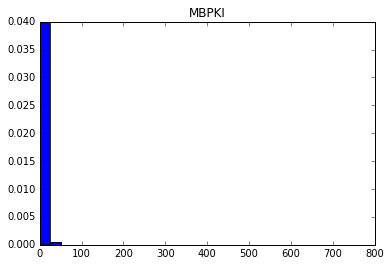

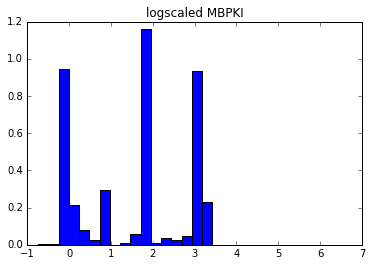

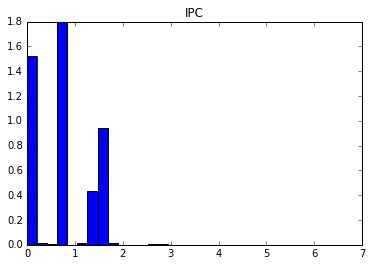

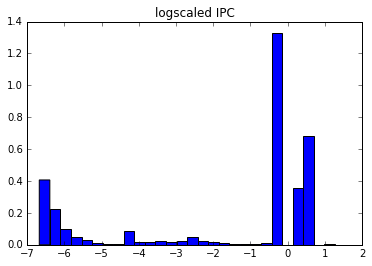

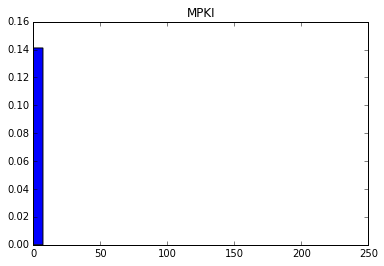

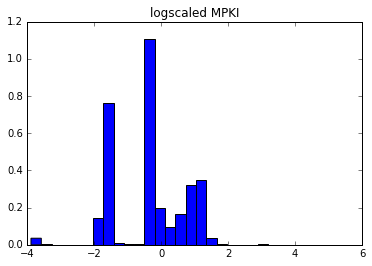

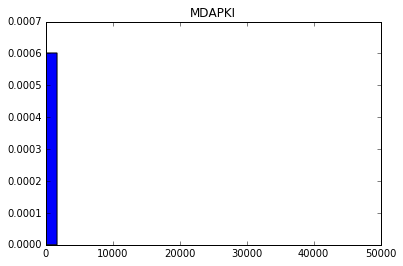

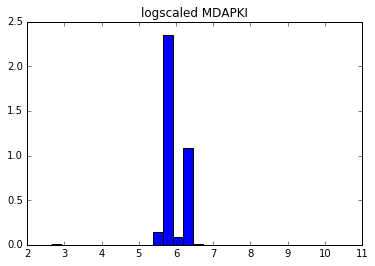

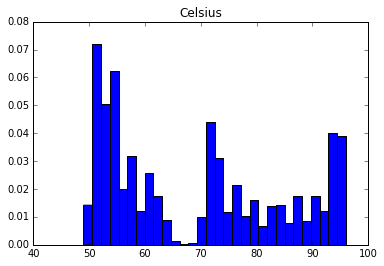

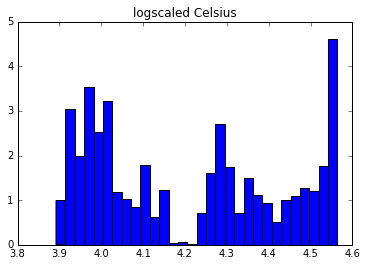

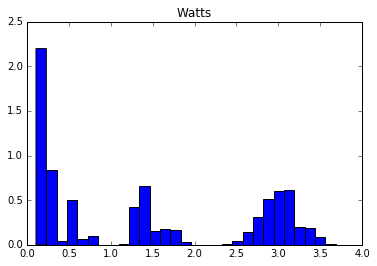

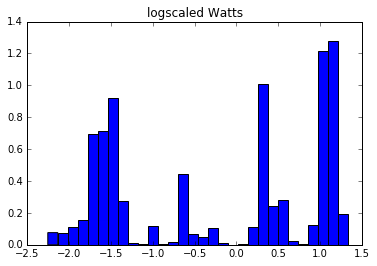

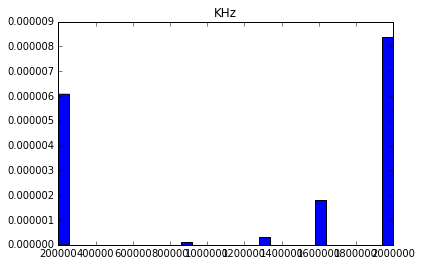

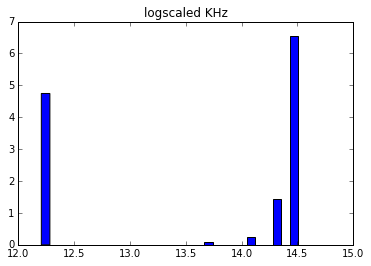

In [58]:
nbins=30
for col in data.columns:
    stat = np.array(data.loc[:,col])
    logstat = np.log(stat)
    
    plt.figure()
    plt.hist(stat, normed=True, log=False, bins=nbins)
#     plt.yscale('log')
    plt.title(col)
    plt.show()
    
    plt.figure()
    plt.hist(logstat, normed=True, log=False, bins=nbins)
    plt.title("logscaled {}".format(col))
    plt.show()

## Place collected 